In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For unique combination

In [33]:
model = 'LLama3' #LLama3 - Mistral - Flant5
ds = 'mhs' #HC - FtW - mhs
step = '1' # 1 - 2


root = f"../Outputs/{model}_{ds}_step"

csv_file_path = root + step + '.csv'


if step == '1' :
    k = 33
elif step == '2':
    k = 24
    
df = pd.read_csv(str(csv_file_path))

id_def = df['ID_def'].tolist()
Predictions_list = df['Predictions'].apply(eval).tolist()
Labels_list = df['Labels'].apply(eval).tolist()

labels = Labels_list[0]


In [34]:
i = 0
error_dist = []
def get_errors_distribution(pred,labels):
    hs_errors = 0
    nhs_errors = 0
    for p,l in zip(pred,labels):
        if p == l:
            continue
        else:
            if l == 1:
                hs_errors+=1
            else:
                nhs_errors +=1
                
    return (hs_errors,nhs_errors)

for j in range(len(set(id_def))):
    hs = 0
    nhs = 0
    first = Predictions_list[i]
    second = Predictions_list[i+1]
    third = Predictions_list[i+2]

    hs1,nhs1 = get_errors_distribution(first,labels)
    hs2,nhs2 = get_errors_distribution(second,labels)
    hs3,nhs3 = get_errors_distribution(third,labels)

    hs = (hs1+hs2+hs3)/3
    nhs = (nhs1+nhs2+nhs3)/3

    i +=3
    error_dist.append((hs,nhs))
    

In [29]:
for e in error_dist:
    print(e[0])

77.0
70.66666666666667
49.666666666666664
51.0
46.666666666666664
68.0
59.0
65.0
60.666666666666664
64.66666666666667
59.333333333333336


In [32]:
for e in error_dist:
    print(e[0])

560.0
490.0
333.0
339.0
372.6666666666667
433.3333333333333
383.3333333333333
407.0
487.0
475.0
481.0


In [35]:
for e in error_dist:
    print(e[0])

185.33333333333334
174.0
230.0
189.66666666666666
158.66666666666666
164.33333333333334
183.0
171.66666666666666
192.0
178.33333333333334
159.0


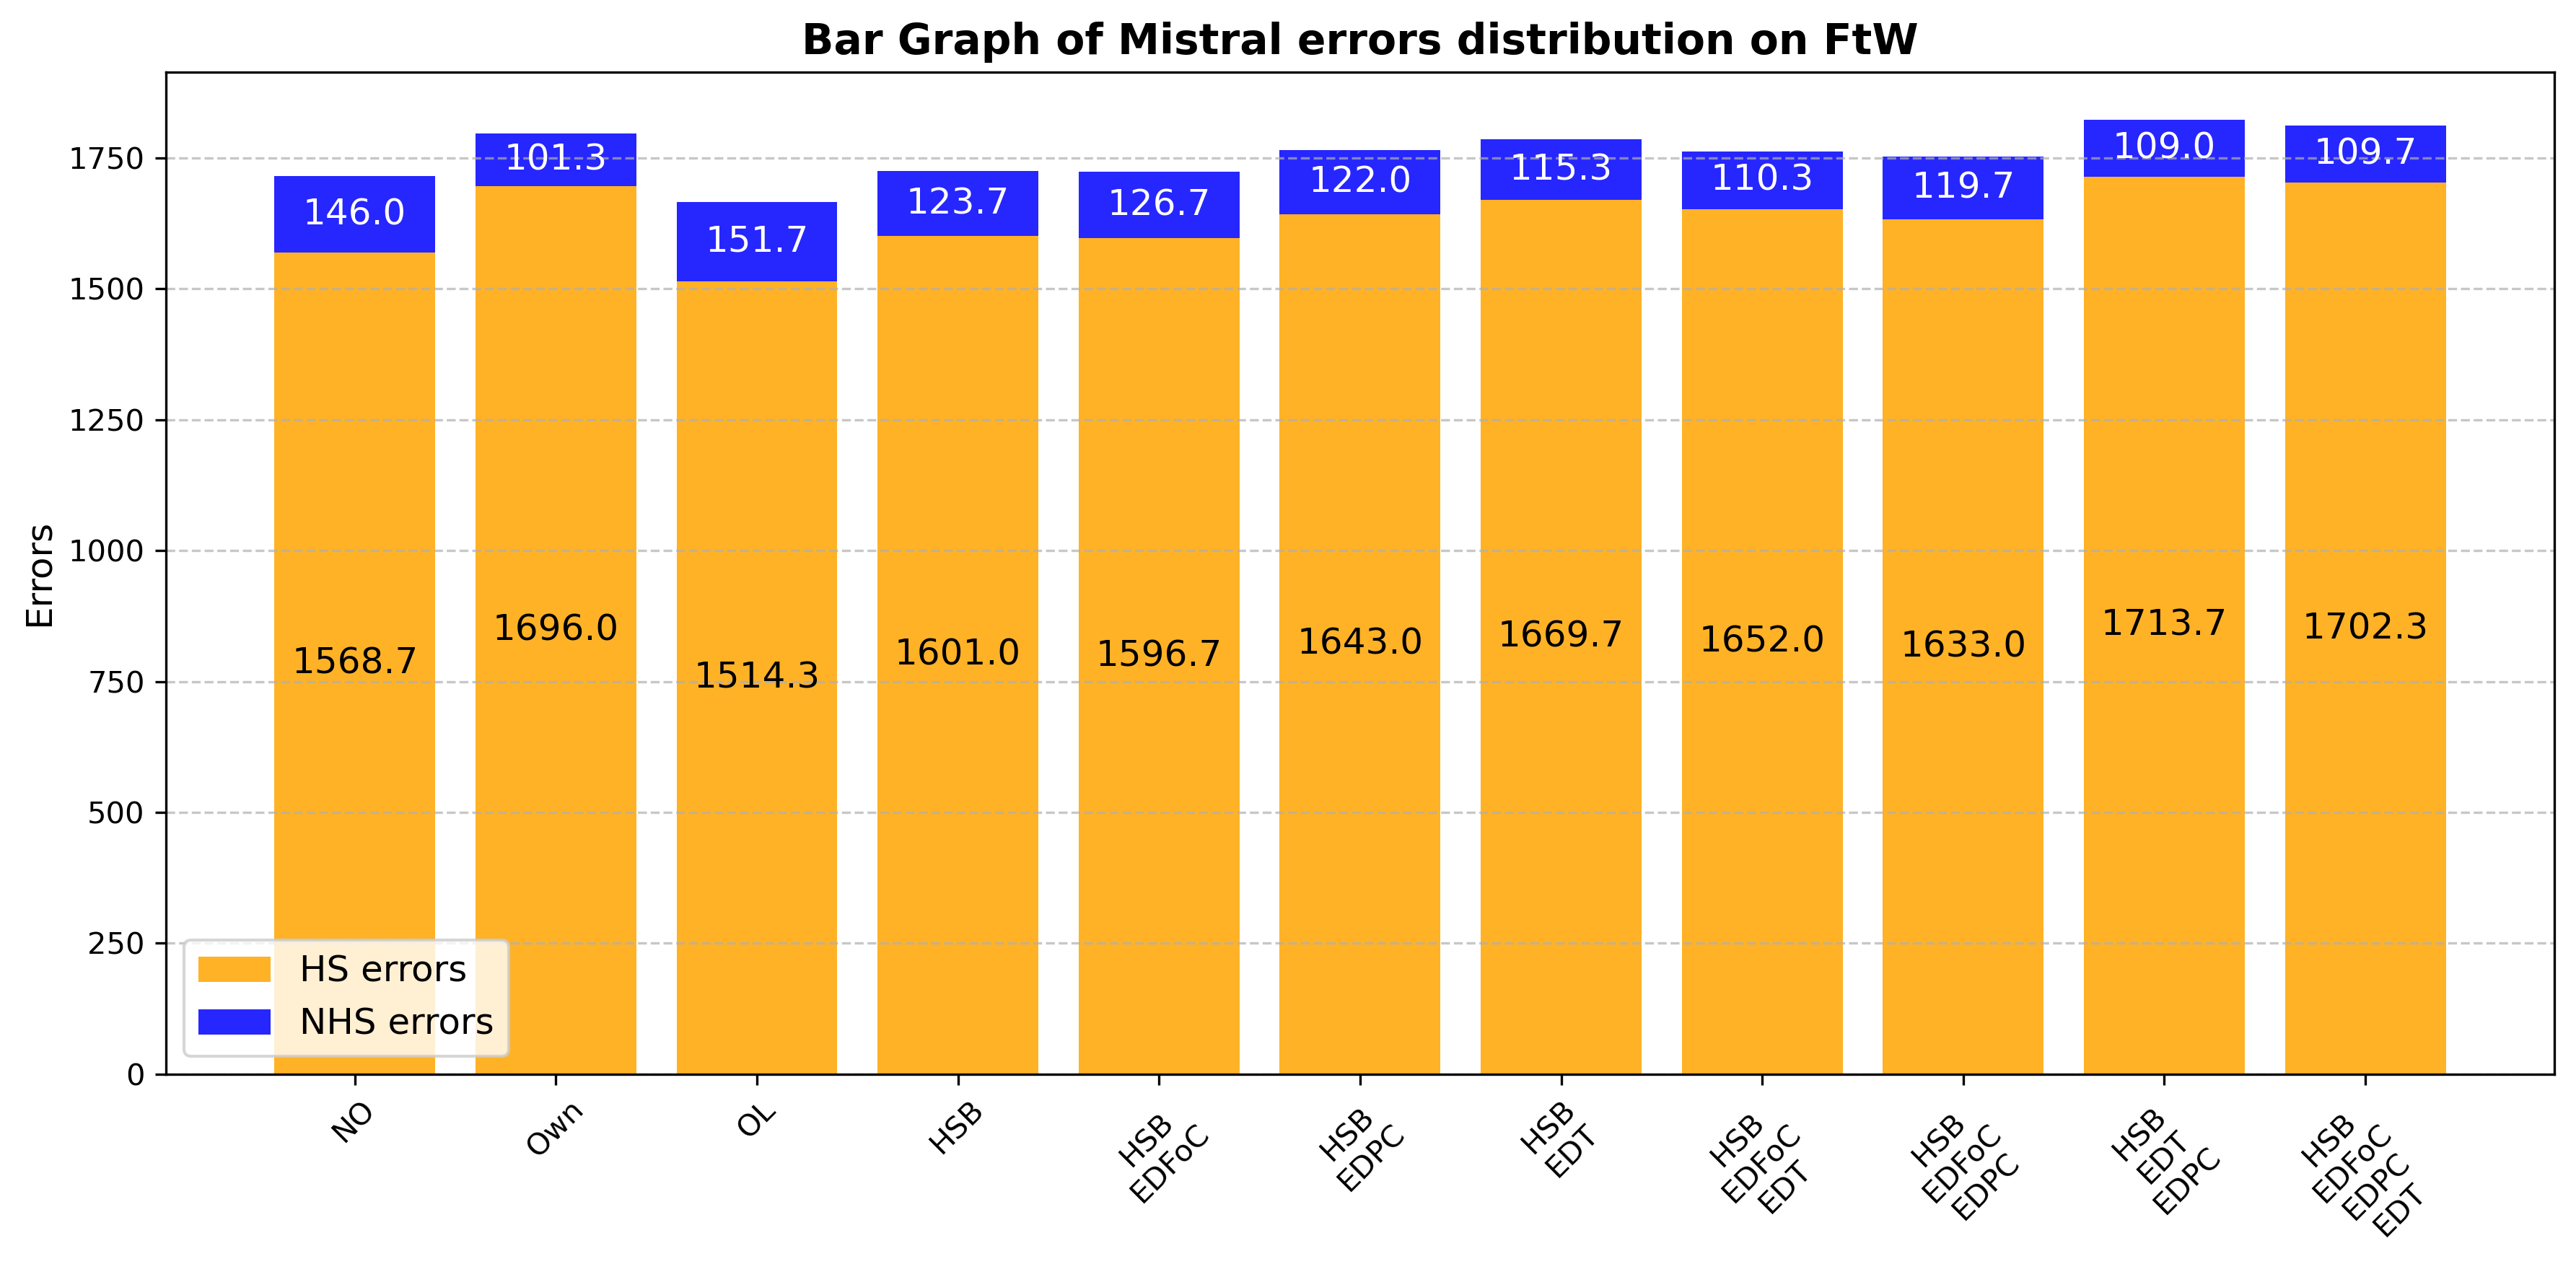

In [8]:

if step == '1':
    id_Def = ['NO','Own','OL','HSB','HSB\nEDFoC', 'HSB\nEDPC','HSB\nEDT', 'HSB\nEDFoC\nEDT', 'HSB\nEDFoC\nEDPC', 'HSB\nEDT\nEDPC','HSB\nEDFoC\nEDPC\nEDT']
elif step == '2':
    id_Def = ["+LAA","+LAA\nPI","+LAA\nExc","+LAA\nIHS","+LAA\nPI\nExc","+LAA\nExc\nIHS","+LAA\nPI\nIHS","+LAA\nPI\nIHS\nExc"]
# Unpacking tuples into separate lists
hs = [t[0] for t in error_dist]
nhs = [t[1] for t in error_dist]

# Plotting
plt.figure(figsize=(12, 6), dpi=300)  # Larger, high-resolution figure
x = range(len(error_dist))
bars_hs = plt.bar(x, hs, color='orange', label='HS errors', alpha=0.85)
bars_nhs = plt.bar(x, nhs, color='blue', label='NHS errors', alpha=0.85, bottom=hs)

# Customizing the plot
plt.ylabel("Errors", fontsize=12)
plt.title(f"Bar Graph of {model} errors distribution on {ds}", fontsize=14, fontweight='bold')
plt.xticks(x, id_Def, rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Adding value annotations
for bar in bars_hs:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{bar.get_height():.1f}",
             ha='center', va='center', fontsize=12, color='black')

for bar, hs_value in zip(bars_nhs, hs):
    plt.text(bar.get_x() + bar.get_width() / 2, hs_value + bar.get_height() / 2, f"{bar.get_height():.1f}",
             ha='center', va='center', fontsize=12, color='white')

# Adjust layout and show
plt.tight_layout()
plt.show()

For All the Combinations

In [ ]:

models = ['LLama3','Mistral','Flant5']
dss = ['HC','FtW','mhs']
steps = ['1','2']

for step in steps:
    for ds in dss:
        for model in models:
    
            root = f"../Outputs/{model}_{ds}_step"
            
            csv_file_path = root + step + '.csv'
            
            
            if step == '1' :
                k = 33
            elif step == '2':
                k = 24
                
            df = pd.read_csv(str(csv_file_path))
            
            id_def = df['ID_def'].tolist()
            Predictions_list = df['Predictions'].apply(eval).tolist()
            Labels_list = df['Labels'].apply(eval).tolist()
            
            labels = Labels_list[0]
            
            i = 0
            error_dist = []
            def get_errors_distribution(pred,labels):
                hs_errors = 0
                nhs_errors = 0
                for p,l in zip(pred,labels):
                    if p == l:
                        continue
                    else:
                        if l == 1:
                            hs_errors+=1
                        else:
                            nhs_errors +=1
                            
                return (hs_errors,nhs_errors)
            
            for j in range(len(set(id_def))):
                hs = 0
                nhs = 0
                first = Predictions_list[i]
                second = Predictions_list[i+1]
                third = Predictions_list[i+2]
            
                hs1,nhs1 = get_errors_distribution(first,labels)
                hs2,nhs2 = get_errors_distribution(second,labels)
                hs3,nhs3 = get_errors_distribution(third,labels)
            
                hs = (hs1+hs2+hs3)/3
                nhs = (nhs1+nhs2+nhs3)/3
            
                i +=3
                error_dist.append((hs,nhs))
            
            
            if step == '1':
                id_Def = ['NO','Own','OL','HSB','HSB\nEDFoC', 'HSB\nEDPC','HSB\nEDT', 'HSB\nEDFoC\nEDT', 'HSB\nEDFoC\nEDPC', 'HSB\nEDT\nEDPC','HSB\nEDFoC\nEDPC\nEDT']
            elif step == '2':
                id_Def = ["+LAA","+LAA\nPI","+LAA\nExc","+LAA\nIHS","+LAA\nPI\nExc","+LAA\nExc\nIHS","+LAA\nPI\nIHS","+LAA\nPI\nIHS\nExc"]
            

            hs = [t[0] for t in error_dist]
            nhs = [t[1] for t in error_dist]
            
            plt.figure(figsize=(12, 6), dpi=800)  # Larger, high-resolution figure
            x = range(len(error_dist))
            bars_hs = plt.bar(x, hs, color='orange', label='HS errors', alpha=0.85)
            bars_nhs = plt.bar(x, nhs, color='blue', label='NHS errors', alpha=0.85, bottom=hs)
            
            plt.ylabel("Errors", fontsize=12)
            plt.title(f"Bar Graph of {model} errors distribution on {ds} in Step {step}", fontsize=14, fontweight='bold')
            plt.xticks(x, id_Def, rotation=0, fontsize=10)
            plt.yticks(fontsize=10)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.legend(fontsize=12)

            plt.ylim(0,1000)
            
            for bar in bars_hs:
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{bar.get_height():.1f}",
                         ha='center', va='center', fontsize=12, color='black')
            
            for bar, hs_value in zip(bars_nhs, hs):
                plt.text(bar.get_x() + bar.get_width() / 2, hs_value + bar.get_height() / 2, f"{bar.get_height():.1f}",
                         ha='center', va='center', fontsize=12, color='white')
            
            plt.savefig(f"../Figures/ED/Error_Distribution_{model}_{ds}_step_{step}.pdf", bbox_inches='tight')
            plt.tight_layout()
            plt.show()

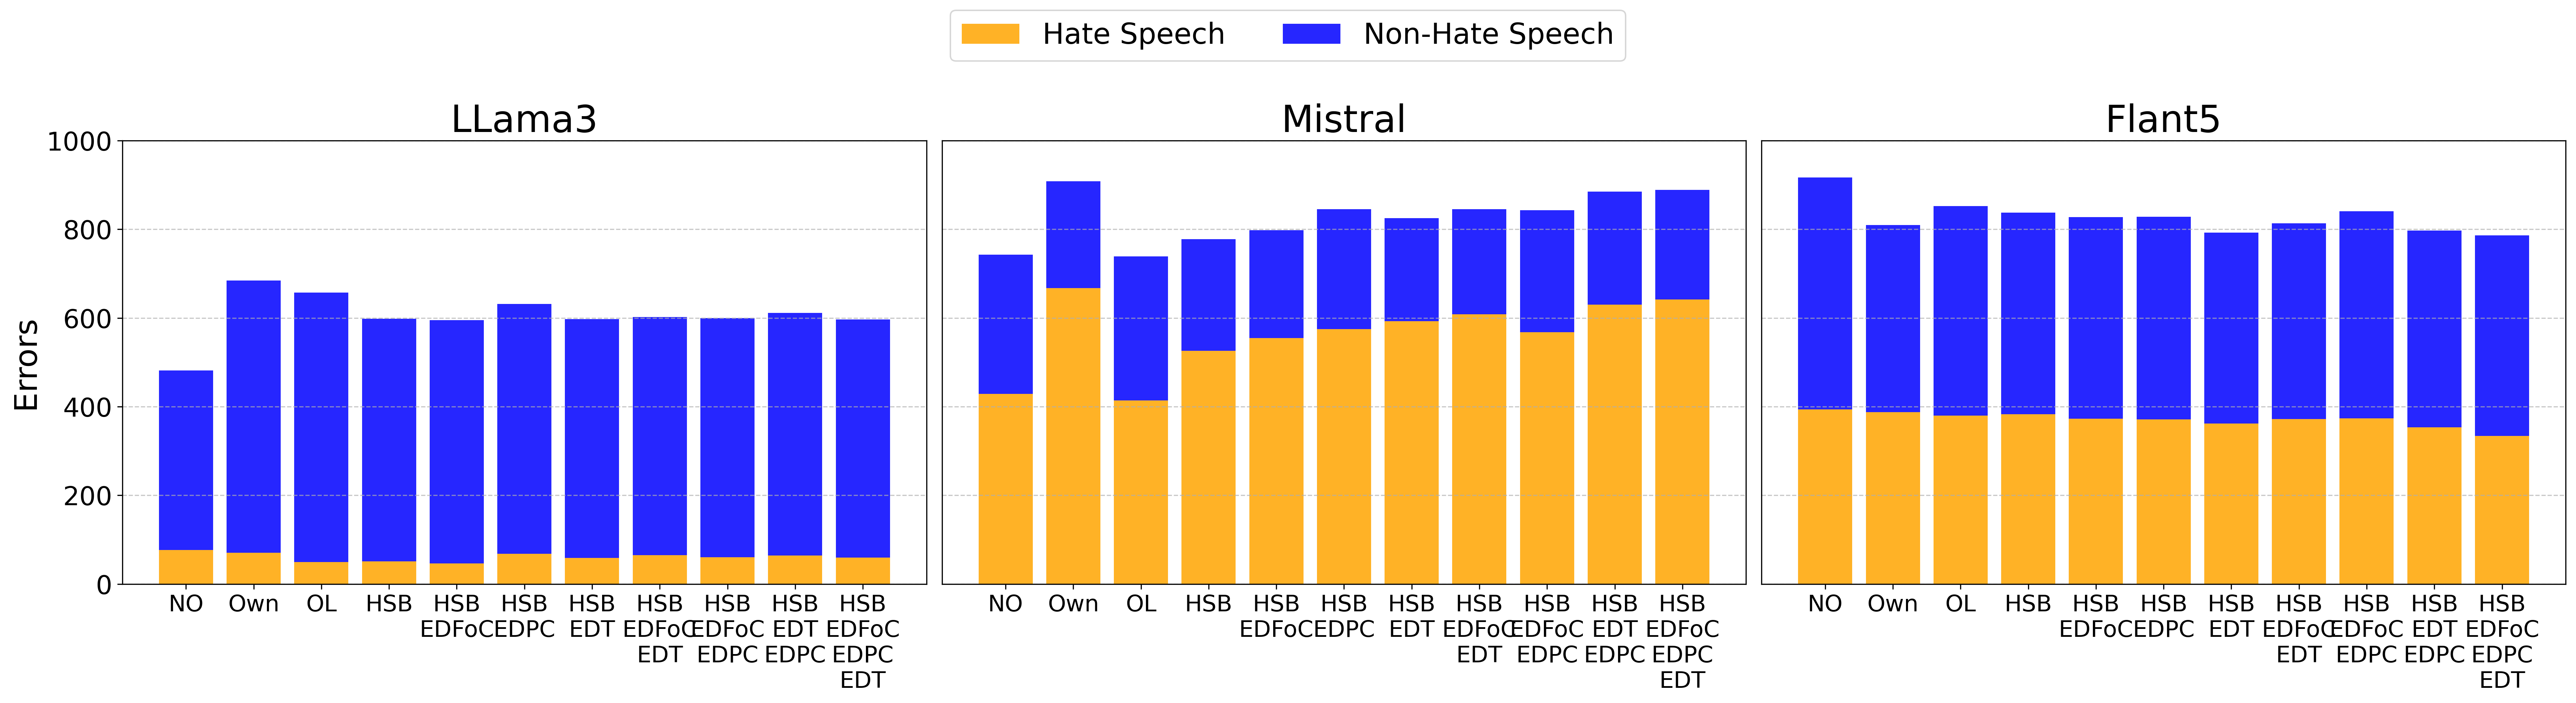

In [10]:

models = ['LLama3','Mistral','Flant5']
dss = ['HC']#,'FtW','mhs']
steps = ['1']#,'2']

fig, axes = plt.subplots(1, 3, figsize=(25, 6), dpi=300)
axes[0].set_ylabel("Errors", fontsize=22)


# Remove ylabel for other plots
for ax in axes[1:]:
    ax.tick_params(axis='y', left=False, labelleft=False)

for step in steps:
    for ds in dss:
        for model, ax in zip(models, axes):  # Iterate over models and subplot axes
            
            root = f"../Outputs/{model}_{ds}_step"
            csv_file_path = root + step + '.csv'
            
            if step == '1':
                k = 33
            elif step == '2':
                k = 24
            
            df = pd.read_csv(str(csv_file_path))
            id_def = df['ID_def'].tolist()
            Predictions_list = df['Predictions'].apply(eval).tolist()
            Labels_list = df['Labels'].apply(eval).tolist()
            
            labels = Labels_list[0]
            
            i = 0
            error_dist = []
            def get_errors_distribution(pred, labels):
                hs_errors = 0
                nhs_errors = 0
                for p, l in zip(pred, labels):
                    if p == l:
                        continue
                    else:
                        if l == 1:
                            hs_errors += 1
                        else:
                            nhs_errors += 1
                return (hs_errors, nhs_errors)
            
            for j in range(len(set(id_def))):
                hs = 0
                nhs = 0
                first = Predictions_list[i]
                second = Predictions_list[i + 1]
                third = Predictions_list[i + 2]
                
                hs1, nhs1 = get_errors_distribution(first, labels)
                hs2, nhs2 = get_errors_distribution(second, labels)
                hs3, nhs3 = get_errors_distribution(third, labels)
                
                hs = (hs1 + hs2 + hs3) / 3
                nhs = (nhs1 + nhs2 + nhs3) / 3
                
                i += 3
                error_dist.append((hs, nhs))
            
            if step == '1':
                id_Def = ['NO','Own','OL','HSB','HSB\nEDFoC', 'HSB\nEDPC','HSB\nEDT', 
                          'HSB\nEDFoC\nEDT', 'HSB\nEDFoC\nEDPC', 'HSB\nEDT\nEDPC',
                          'HSB\nEDFoC\nEDPC\nEDT']
            elif step == '2':
                id_Def = ["+LAA","+LAA\nPI","+LAA\nExc","+LAA\nIHS","+LAA\nPI\nExc",
                          "+LAA\nExc\nIHS","+LAA\nPI\nIHS","+LAA\nPI\nIHS\nExc"]
            
            hs = [t[0] for t in error_dist]
            nhs = [t[1] for t in error_dist]
            
            x = range(len(error_dist))
            bars_hs = ax.bar(x, hs, color='orange', label='Hate Speech', alpha=0.85)
            bars_nhs = ax.bar(x, nhs, color='blue', label='Non-Hate Speech', alpha=0.85, bottom=hs)
            
            #ax.set_ylabel("Errors", fontsize=12)
            #ax.set_title(f"{model} on HateCheck (Step {step})", fontsize=18)
            if model == 'Flant5':
                model == 'FlanT5'
            else:
                model = model
                
            ax.set_title(f"{model}", fontsize=18)
            #ax.set_title(f"{model} on HateCheck (Step {step})", fontsize=18)


            ax.set_title(f"{model}", fontsize=26)
            ax.set_xticks(x)
            ax.set_xticklabels(id_Def, rotation=0, fontsize=16)
            ax.tick_params(axis='y', labelsize=18)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            #ax.legend(fontsize=14)
            ax.set_ylim(0, 1000)
            
            #for bar in bars_hs:
             #   ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{bar.get_height():.1f}",
              #          ha='center', va='center', fontsize=8, color='black')
            
            #for bar, hs_value in zip(bars_nhs, hs):
             #   ax.text(bar.get_x() + bar.get_width() / 2, hs_value + bar.get_height() / 2, f"{bar.get_height():.1f}",
              #          ha='center', va='center', fontsize=8, color='white')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=20, ncol=2, bbox_to_anchor=(0.5, 1.02))


# Adjust layout and save
plt.tight_layout()
plt.savefig(f"../Figures/Error_Distribution/Error_Distribution_{model}_{ds}_step_{step}.pdf", bbox_inches='tight')
plt.show()


Error_Distribution_HC_step_1


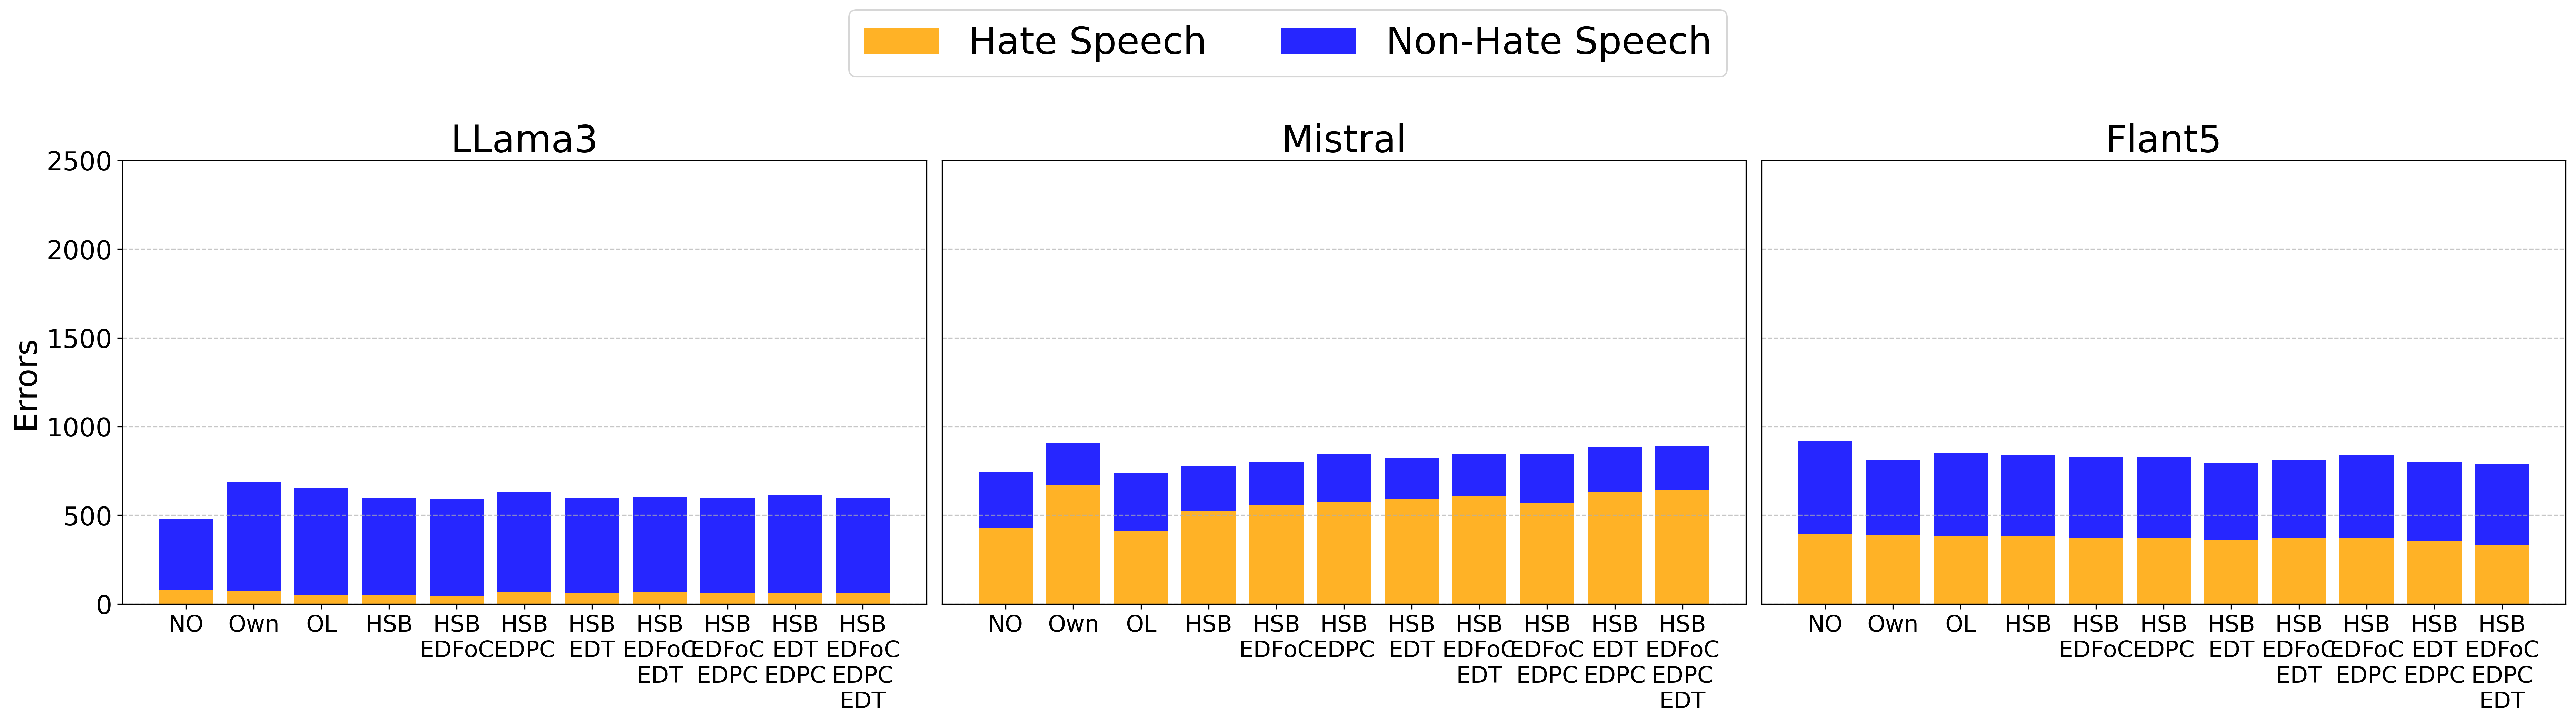

Error_Distribution_FtW_step_1


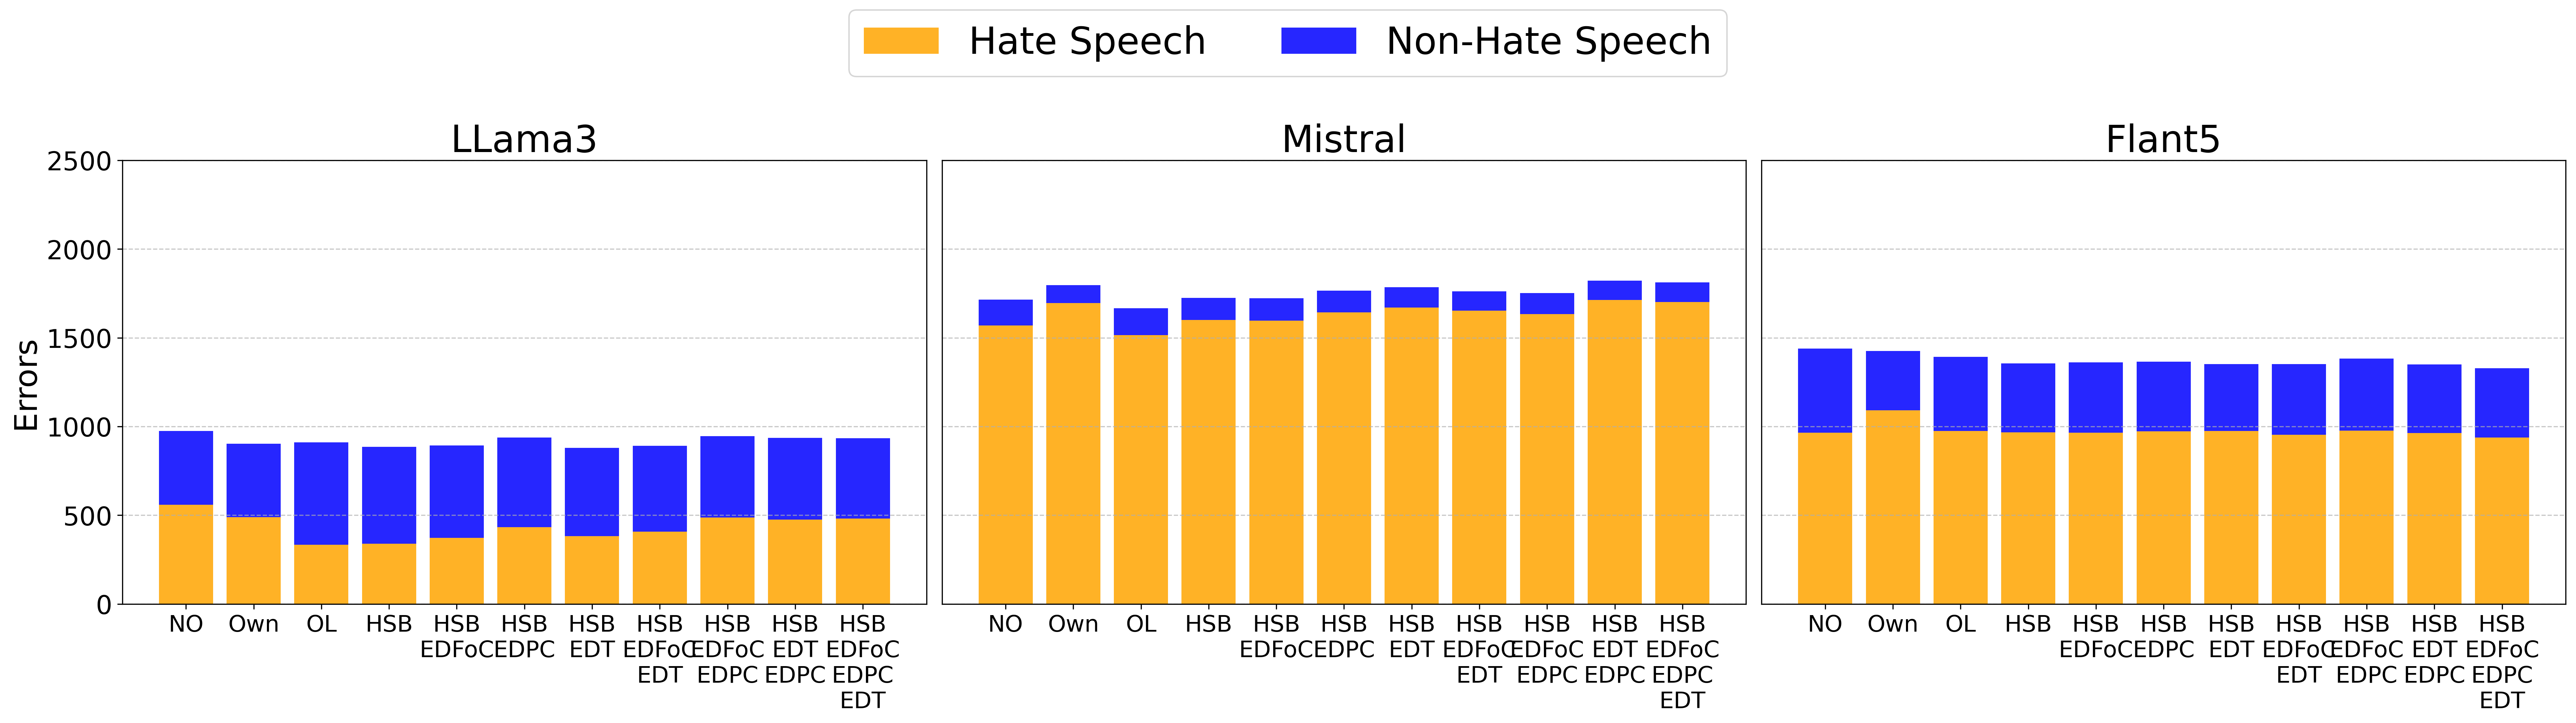

Error_Distribution_mhs_step_1


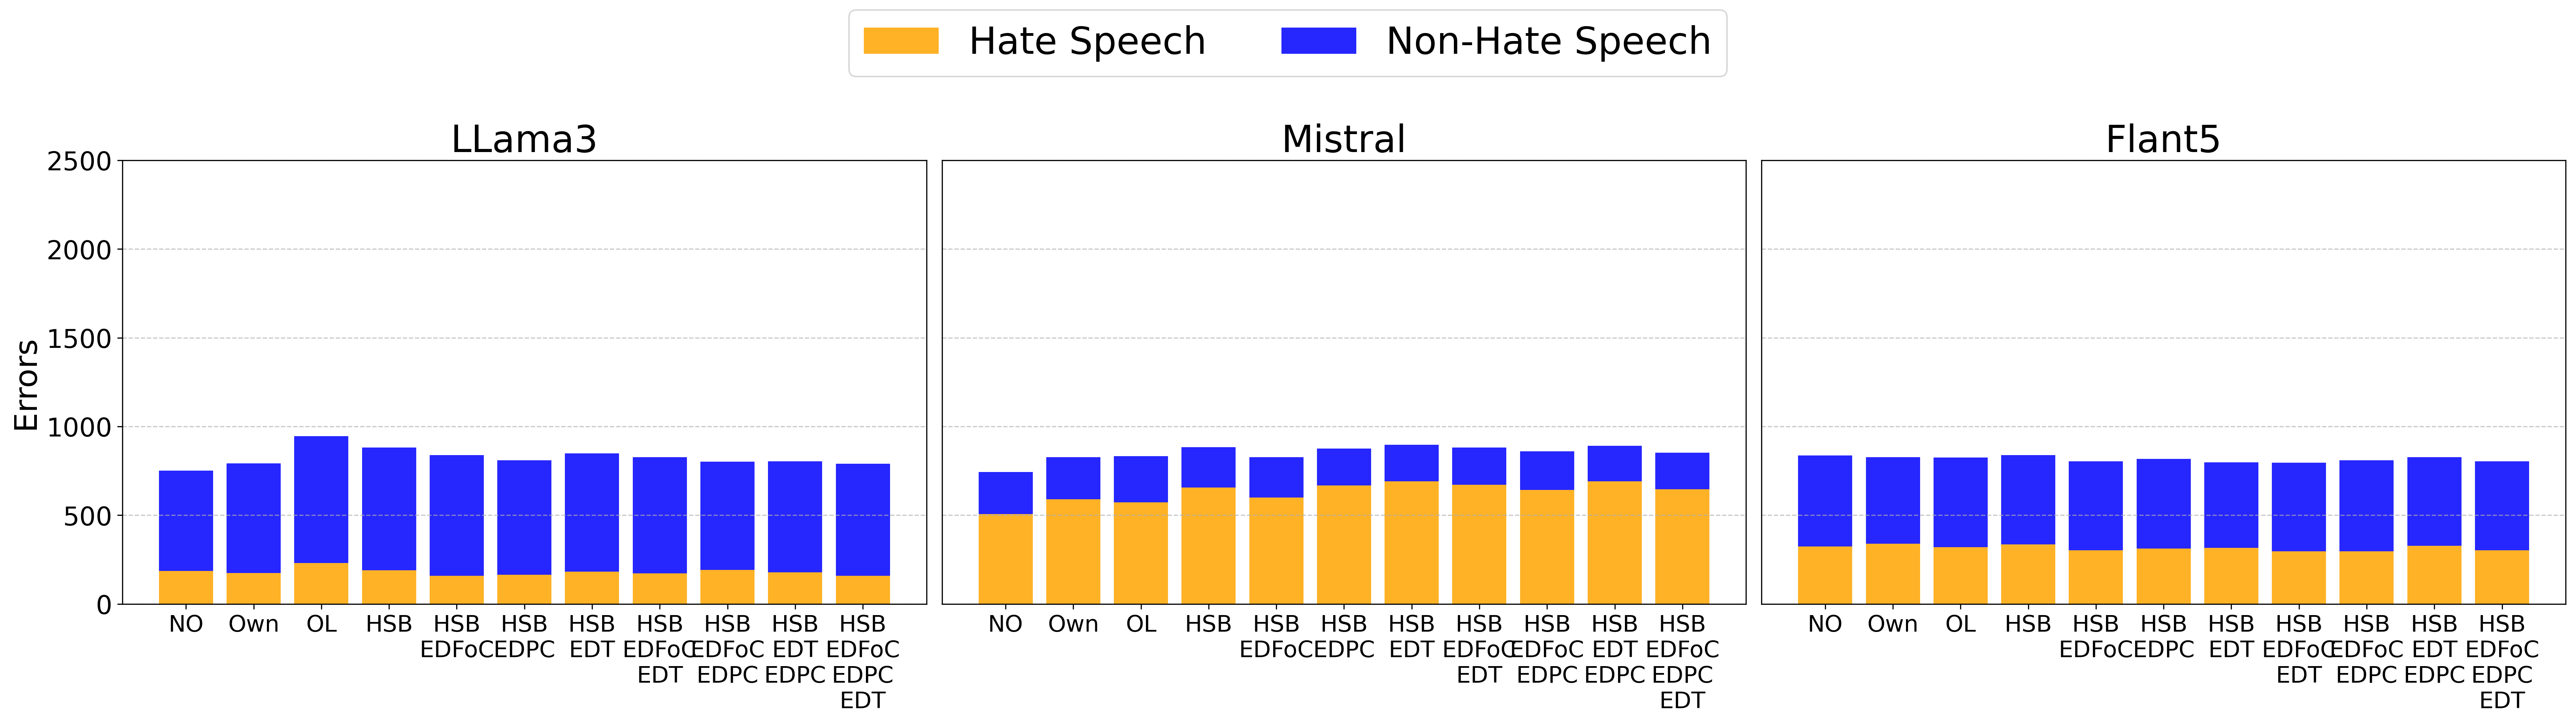

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

models = ['LLama3', 'Mistral', 'Flant5']
dss = ['HC', 'FtW', 'mhs']
steps = ['1']#, '2']

# Loop through datasets and steps
for ds in dss:
    for step in steps:
        fig, axes = plt.subplots(1, 3, figsize=(25, 6), dpi=300)
        axes[0].set_ylabel("Errors", fontsize=22)

        # Remove ylabel for other plots
        for ax in axes[1:]:
            ax.tick_params(axis='y', left=False, labelleft=False)

        for model, ax in zip(models, axes):  # Iterate over models and subplot axes
            root = f"../Outputs/{model}_{ds}_step"
            csv_file_path = root + step + '.csv'

            if step == '1':
                k = 33
            elif step == '2':
                k = 24

            df = pd.read_csv(str(csv_file_path))
            id_def = df['ID_def'].tolist()
            Predictions_list = df['Predictions'].apply(eval).tolist()
            Labels_list = df['Labels'].apply(eval).tolist()

            labels = Labels_list[0]
            i = 0
            error_dist = []

            def get_errors_distribution(pred, labels):
                hs_errors = 0
                nhs_errors = 0
                for p, l in zip(pred, labels):
                    if p == l:
                        continue
                    else:
                        if l == 1:
                            hs_errors += 1
                        else:
                            nhs_errors += 1
                return (hs_errors, nhs_errors)

            for j in range(len(set(id_def))):
                hs = 0
                nhs = 0
                first = Predictions_list[i]
                second = Predictions_list[i + 1]
                third = Predictions_list[i + 2]

                hs1, nhs1 = get_errors_distribution(first, labels)
                hs2, nhs2 = get_errors_distribution(second, labels)
                hs3, nhs3 = get_errors_distribution(third, labels)

                hs = (hs1 + hs2 + hs3) / 3
                nhs = (nhs1 + nhs2 + nhs3) / 3

                i += 3
                error_dist.append((hs, nhs))

            if step == '1':
                id_Def = ['NO', 'Own', 'OL', 'HSB', 'HSB\nEDFoC', 'HSB\nEDPC', 'HSB\nEDT', 
                          'HSB\nEDFoC\nEDT', 'HSB\nEDFoC\nEDPC', 'HSB\nEDT\nEDPC',
                          'HSB\nEDFoC\nEDPC\nEDT']
            elif step == '2':
                id_Def = ["+LAA", "+LAA\nPI", "+LAA\nExc", "+LAA\nIHS", "+LAA\nPI\nExc",
                          "+LAA\nExc\nIHS", "+LAA\nPI\nIHS", "+LAA\nPI\nIHS\nExc"]

            hs = [t[0] for t in error_dist]
            nhs = [t[1] for t in error_dist]

            x = range(len(error_dist))
            bars_hs = ax.bar(x, hs, color='orange', label='Hate Speech', alpha=0.85)
            bars_nhs = ax.bar(x, nhs, color='blue', label='Non-Hate Speech', alpha=0.85, bottom=hs)

            ax.set_title(f"{model}", fontsize=26)
            ax.set_xticks(x)
            ax.set_xticklabels(id_Def, rotation=0, fontsize=16)
            ax.tick_params(axis='y', labelsize=18)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
            ax.set_ylim(0, 2500)

        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='lower center', fontsize=26, ncol=2, bbox_to_anchor=(0.5, 1.02))
        print(f"Error_Distribution_{ds}_step_{step}")
        # Adjust layout and save
        plt.tight_layout()
        plt.savefig(f"../Figures/Error_Distribution/Error_Distribution_{ds}_step_{step}.pdf", bbox_inches='tight')
        plt.show()
